### Significance Analysis of Shingles

Student Name: Madhu Narayanan

Batch: PGPDSBA - July 2020

Date:- 11.09.2020 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats as sm
from scipy.stats import ttest_1samp , ttest_ind
from scipy.stats import f
import statsmodels.stats.power as smp
import os

In [2]:
#os.chdir

#### Problem Statement:

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

The file (A & B shingles.csv ) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.


Let's download the dataset 'A & B shingles.csv' for the Significance analysis

In [3]:
df = pd.read_csv('A & B shingles.csv')

In [4]:
df.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [5]:
df.tail()

,A,B
31,0.40,NaN
32,0.29,NaN
33,0.43,NaN
34,0.34,NaN
35,0.37,NaN


In [6]:
df.shape

(36, 2)

In [7]:
df.isnull().sum()

A    0
B    5
dtype: int64

The original dataset had five records with null values in column B. We have removed the null values into a new DataFrame 'shing'

In [8]:
df.A.nunique()

28

In [9]:
df.B.nunique()

23

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


11.399999999999999


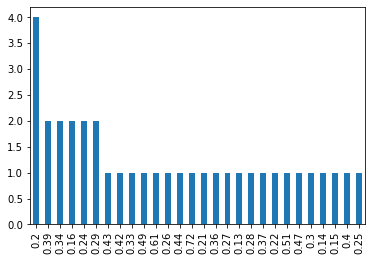

In [11]:
print(df['A'].sum())
df['A'].value_counts().plot(kind='bar');

8.48


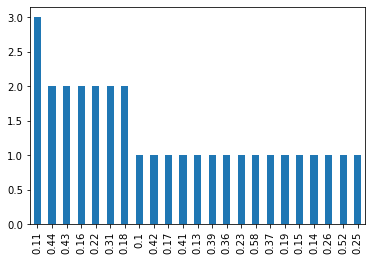

In [12]:
print(df['B'].sum())
df['B'].value_counts().plot(kind='bar');

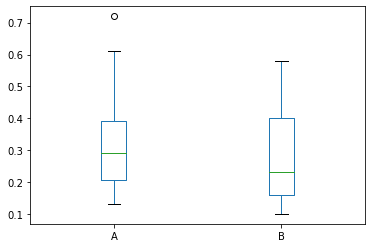

In [13]:
df.plot(kind='box');

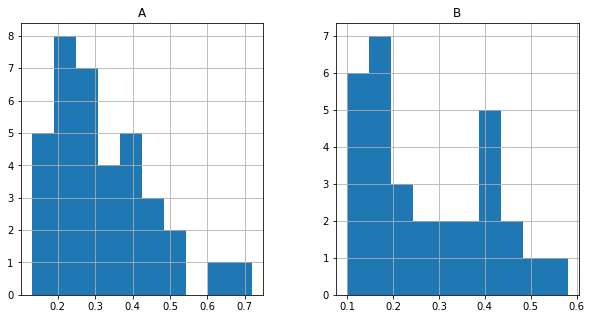

In [14]:
df.iloc[:,0:2].hist(figsize=(10,5))
plt.show()

Mean and Median Values of each sample are different between both shingles data.

Bothe the shingle data looks more assymmetrically distributed rather right-skewed.

### 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


#### Let's formulate Hypothesis testing for Shingles A:

Step 1: Given: nA = 36, x¯¯A =0.3087, σA = 0.1436, μA = 0.3500.  

• Step 2: Let us formulate the hypothesis.

H0 (null hypothesis): μA (population mean) >= 0.3500

H1 (alternate hypothesis): μA (population mean) < 0.3500
[this is an example of a one-tailed test]

• Step 3: Define the test statistic based on the information in the question. Here, we are going to use the Zstat .

Let us calculate the value of the test statistic.

In [16]:
t_statistic_A, p_value_A = ttest_1samp(df.A, 0.35)
print('One sample t_test result for Shingle A: \nt statistic_A: {0}\np-value_A: {1} '.format(t_statistic_A, p_value_A))

One sample t_test result for Shingle A: 
t statistic_A: -1.4735046253382782
p-value_A: 0.14955266289815025 


In [17]:
alpha = 0.05 # Level of significance (95% of Confidence level)
print('Level of significance - ⍺: %.2f' %alpha)
if p_value_A < alpha: 
    print('We have evidence to reject the null hypothesis since p_value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p_value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value_A)

Level of significance - ⍺: 0.05
We have no evidence to reject the null hypothesis since p_value > Level of significance
Our one-sample t-test p-value= 0.14955266289815025


We see that the p-value > α for Shingles A . Thus, it is confirmed we have no evidence to Reject the null hypothesis (Ho).  

##### Hence with 95% confidence, we fail to reject the Null Hypothesis and reject company's claim that mean moisture content is less than 0.35 pound per 100 square feet for Shingles A.

#### Let's formulate Hypothesis testing for Shingles B:

Given: nB = 31, x¯¯B =0.2736, σB = 0.1373, μB = 0.3500.

Let us formulate the hypothesis. 

H0 (null hypothesis): μB (population mean) >= 0.3500  

H1 (alternate hypothesis): μB (population mean) < 3500

[this is an one-tailed test]  

Let us calculate the value of the test statistic using One-sample t-test.

In [18]:
t_statistic_B, p_value_B = ttest_1samp(df.B, 0.35,nan_policy='omit')
print('One sample t_test result for Shingle B: \nt statistic_B: {0}\np-value_B: {1} '.format(t_statistic_B, p_value_B))

One sample t_test result for Shingle B: 
t statistic_B: -3.1003313069986995
p-value_B: 0.004180954800638365 


In [19]:
alpha = 0.05 # Level of significance (95% of Confidence level)
print('Level of significance - ⍺: %.2f' %alpha)
if p_value_B < alpha: 
    print('We have evidence to reject the null hypothesis since p_value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p_value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value_B)

Level of significance - ⍺: 0.05
We have evidence to reject the null hypothesis since p_value < Level of significance
Our one-sample t-test p-value= 0.004180954800638365


##### We see that the p-value < α for Shingles B . Thus, it is confirmed we Reject the the null hypothesis (Ho).

With 95% confidence, we are able to Reject the Null Hypothesis and accept company's claim that mean moisture content is less than 0.35 pound per 100 square feet for Shingles B



#### From both the shingles,the evidences are different where:   

a. we fail to reject Null hypothesis (Ho) for Shingle A and reject company's claim that mean moisture content is less than 0.35 pound per 100 square feet for Shingle A. 

b. we reject the Null hypothesis (Ho) for Shingle B and accept company's claim that mean moisture content is less than 0.35 pound per 100 square feet for Shingle B. 


#### Hence from the evidence taken from the above hypothesis workings we can say that:

a. the shingle A is NOT within the permissible limit of having mean moisture <0.35 pounds per 100 square feet as company claimed.

b. the shingle B is within the permissible limit of having mean moisture <0.35 pounds per 100 square feet as company claimed.

### 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?


In [20]:
df['Diff'] = df['A'] - df['B']
df

,A,B,Diff
0,0.44,0.14,0.30
1,0.61,0.15,0.46
2,0.47,0.31,0.16
3,0.30,0.16,0.14
4,0.15,0.37,-0.22
5,0.24,0.18,0.06
6,0.16,0.42,-0.26
7,0.20,0.58,-0.38
8,0.20,0.25,-0.05
9,0.20,0.41,-0.21


In [21]:
df.Diff.describe().T

count    31.000000
mean      0.035161
std       0.231817
min      -0.380000
25%      -0.165000
50%       0.020000
75%       0.150000
max       0.620000
Name: Diff, dtype: float64

To determine the means are same for both samples of Shigles A & B, let's conduct hypothesis testing for the same.

The hypothesis construct we are going to do is whether the difference of Mean of Shingle A & Mean of Shingle B = 0:

Hypothesis:  

Ho : μA-μB = 0 ( If the difference between Mean of Shingles A & B = 0 then they are equal,so the  Population Mean is same for both the samples A & B).   

H1 : μA-μB ≠ 0 ( If the difference between Mean of Shingles A & B ≠ 0 then they are not equal,so the  Population Mean is NOT same for both the samples A & B).

Note: We are considering 95% confidence level for this test as standard as no spoecific mentioning done on the same.

Therefore calculating Two-sampled T-Test: Please note that the length of the sample is not the same for A & B shingles, so we use nan_policy='omit' to consider them equal.

Calculating T-critical value at 95% confidence level (⍺=0.05 or 5%): 

In [22]:
t_statistic, p_value  = ttest_ind(df.A,df.B,nan_policy='omit')
print('tstat',t_statistic)    
print('P Value',p_value)    

tstat 1.2896282719661123
P Value 0.2017496571835306


In [23]:
print('two-sample t-test p-value is:', p_value)

alpha = 0.05

if p_value < alpha:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the Population mean is not the same for both the Shingles A & B')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the Population mean is the same for both the Shingles A & B')

two-sample t-test p-value is: 0.2017496571835306
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the Population mean is the same for both the Shingles A & B


#### Hence we conclude from the above tests that the Population mean is the same for both the samples of Shingle A & B.

Thus confirming the fact that for different samples from same population, the population mean remains the same.

We have used Two-sampled T-Test to confirm the same.




Test of Power on Type II error:   

Before we conclude with closing remarks, let's do the Power of Test which invariably gives us the picture of what chances does the given samples can result in Type II error. 

This means what chances does the samples have in making the error of Failing to reject the hypothesis when it is False.

In [24]:
smp.tt_solve_power(effect_size=(0.035161/0.231817), nobs=36, alpha=0.05, power=None, alternative='larger')

0.2259211072085413

The above result shows that Power of test (β) is : 0.2259 or 22.59%.  

This means, the given the sample sets, the chances of making Type II error (Failing to reject Ho when it is False) is: 77.41% (1-β).   This is high which will negatively impact on the tests done. It will have ‘higher consumer risk’, which will affect the consumers.

So what should be the sample size required to reduce the Type II error? Assuming Power of test at 95% level

In [25]:
smp.tt_solve_power(effect_size=(0.035161/0.231817), nobs=None, alpha=0.05, power=0.95, alternative='larger')

471.77298885022685

From the above it is evident that for a Power of Test @ 90%, to reduce the Type II error to <=5%, we need 472 samples to evaluate.

### The inference summary of all the tests conducted above are as follows:

1. #### From both the shingles,the evidences are different where:   

a. we fail to reject Null hypothesis (Ho) for Shingle A and reject company's claim that mean moisture content is less than 0.35 pound per 100 square feet for Shingles A. 

b. we reject the Null hypothesis (Ho) for Shingle B and accept company's claim that mean moisture content is less than 0.35 pound per 100 square feet for Shingles A. 


From the evidence taken from the above hypothesis workings whether the Population Mean of both shingles A & B are same, we can say that:

a. the shingle A is NOT within the permissible limit of having mean moisture <0.35 pounds per 100 square feet as company claimed.

b. the shingle B is within the permissible limit of having mean moisture <0.35 pounds per 100 square feet as company claimed.

2. Formulated the hypothesis that the Population Mean for shingle A & B are equal and conducted the test of hypothesis using Two-sampled t-test. Since P-value is > ⍺ from the T-statistic calculated (0.201749 > 0.05) we fail to reject the Null Hypothesis and concluded from the evidence that the difference mean of both Shingles A and B = 0.   

##### Hence the Population Mean for both the Shingles are equal.

#### Recommendations to get better accuracy in results:

From the evidence collected by doing the Power of Test (β) shows that Power of test is : 0.2259 or 22.59%%.     
This means, the given the sample sets, the chances of making Type II error (Failing to reject hypothesis when it is False) is : 77.41%.

So to reduce the Type II error to a level of <=5% (β-95%), when we calculated, it was statistically found out that having a sample size 472 or more will reduce the Type II error and increase the accuracy of the result. In simple words, we can reduce the error of "Failing to reject hypothesis when it is False".


------------------------------------------------------------------   End of Report   -----------------------------------------------------------------------------------------